## Step 1: Ingest Data

We will use RESTful API to retrieve traffic camera data from the public City of Calgary website https://data.calgary.ca/Transportation-Transit/Traffic-Cameras/k7p9-kppz/about_data

We will use the python library to help make our requests.

In [ ]:
import requests
import pandas as pd
import io

api_url = 'https://data.calgary.ca/resource/k7p9-kppz.csv'


response = requests.get(api_url)

if response.status_code == 200:
  data = io.StringIO(response.text)
  df = pd.read_csv(data)
  display(df.head())
else:
  print("Failed to get data")

,camera_url,quadrant,camera_location,point
0,Camera 158 (http://trafficcam.calgary.ca/loc15...,SW,26 Ave / 4 St SW,POINT (-114.0716774 51.0296112)
1,Camera 30 (http://trafficcam.calgary.ca/loc29....,SE,114 Avenue / 52 Street SE,POINT (-113.958331 50.9504395)
2,Camera 142 (http://trafficcam.calgary.ca/loc14...,SW,90 Avenue / 24 Street SW,POINT (-114.1177502 50.9724213)
3,Camera 90 (http://trafficcam.calgary.ca/loc89....,NW/NE,Samis Road / Centre Street North,POINT (-114.0624739 51.0549834)
4,Camera 38 (https://trafficcam.calgary.ca/loc37...,NW,Crowchild Trail / Shaganappi Trail NW,POINT (-114.149379 51.0988494)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   camera_url       176 non-null    object
 1   quadrant         176 non-null    object
 2   camera_location  176 non-null    object
 3   point            176 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [ ]:
df[['Camera_Number', 'URL']] = df['camera_url'].str.extract(r'Camera (\d+) \((http[^\)]+)\)')
df[['longitude', 'latitude']] = df['point'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)', expand=True)
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
df.drop(columns=['camera_url','point'], inplace = True)
display(df.head())

,quadrant,camera_location,Camera_Number,URL,longitude,latitude
0,SW,26 Ave / 4 St SW,158,http://trafficcam.calgary.ca/loc157.jpg,-114.071677,51.029611
1,SE,114 Avenue / 52 Street SE,30,http://trafficcam.calgary.ca/loc29.jpg,-113.958331,50.950440
2,SW,90 Avenue / 24 Street SW,142,http://trafficcam.calgary.ca/loc141.jpg,-114.117750,50.972421
3,NW/NE,Samis Road / Centre Street North,90,http://trafficcam.calgary.ca/loc89.jpg,-114.062474,51.054983
4,NW,Crowchild Trail / Shaganappi Trail NW,38,https://trafficcam.calgary.ca/loc37.jpg,-114.149379,51.098849


In [ ]:
from IPython.display import Image, display


image_url = 'http://trafficcam.calgary.ca/loc29.jpg'

display(Image(url=image_url))


In [ ]:
try:
    from google.colab import drive
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [ ]:
import sys

!git clone https://github.com/ultralytics/yolov5 --tag 6.2  # clone
!mv /content/6.2 /content/yolov5
%pip install -qr /content/yolov5/requirements.txt  # install
sys.path.insert(0,'/content/yolov5')

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-290-gb2ffe055 Python-3.10.12 torch-2.1.0+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/107.7 GB disk)


detect: weights=['yolov5s.pt'], source=/content/images/, data=yolov5/data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-290-gb2ffe055 Python-3.10.12 torch-2.1.0+cu121 CPU

100% 14.1M/14.1M [00:00<00:00, 115MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/images/image_0.jpg: 768x1024 3 cars, 2 buss, 1 truck, 1 traffic light, 1 backpack, 1330.6ms
Speed: 9.9ms pre-process, 1330.6ms inference, 46.2ms NMS per image at shape (1, 3, 1024, 1024)
Results saved to yolov5/runs/detect/exp


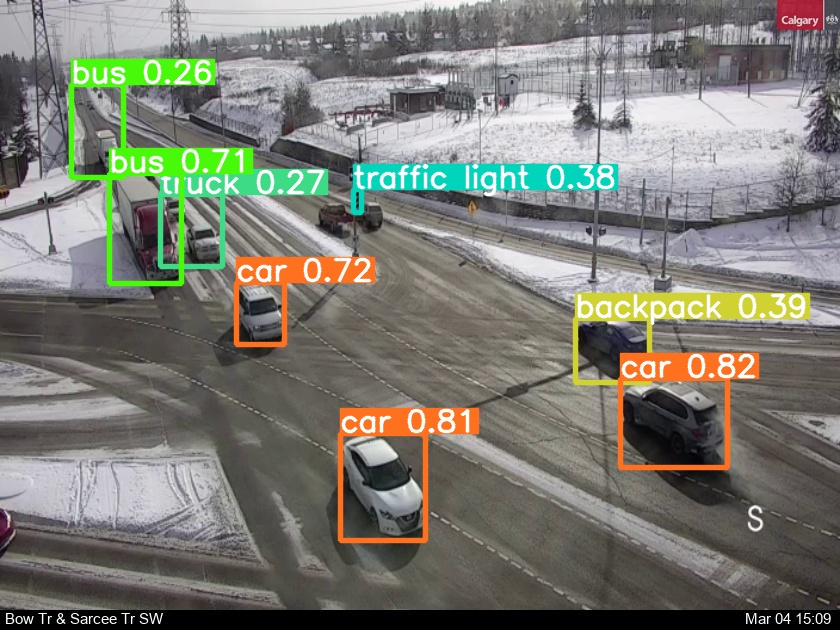

In [ ]:
import urllib.request
import shutil
import os
from IPython.display import Image, display

#
image_url = df.loc[5, 'URL']
image_name = "image_0.jpg"

# Directories setup
images_dir = "/content/images/"
yolo_output_dir = "/content/yolov5/runs/detect/"

# Ensure the directories exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(yolo_output_dir, exist_ok=True)

# Clear previous YOLO runs to avoid clutter
!rm -rf {yolo_output_dir}*

# Local file path where the image will be saved
local_img_file = os.path.join(images_dir, image_name)

# Download and save the image
with urllib.request.urlopen(image_url) as response, open(local_img_file, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

# Run YOLOv5 to classify the downloaded image
!python /content/yolov5/detect.py --weights yolov5s.pt --img 1024 \
  --conf 0.25 --source {images_dir}

# Since YOLOv5 increments the output folder for each run, find the latest output directory
latest_run_dir = sorted([os.path.join(yolo_output_dir, d) for d in os.listdir(yolo_output_dir) if os.path.isdir(os.path.join(yolo_output_dir, d))])[-1]


detected_image_path = os.path.join(latest_run_dir, image_name)

display(Image(filename=detected_image_path, width=600))


Sets up the directories for storing images and YOLOv5 outputs.
Clears the YOLOv5 detect output directory to avoid clutter from previous runs.
Downloads the specified image from your DataFrame and saves it locally.
Runs the YOLOv5 model on the saved image to perform object detection.
Finds the latest output directory created by YOLOv5 (since YOLOv5 creates a new directory for each run) and constructs the path to the detected image.
Displays the image with detected objects using IPython's Image display function.

In [ ]:
import torch

yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

results = yolo_model(local_img_file)

dt = results.pandas().xyxy[0]
dt

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-290-gb2ffe055 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,339.807129,433.034515,425.967651,535.745911,0.877395,2,car
1,233.355148,283.528625,285.170471,346.235260,0.791213,2,car
2,618.106995,380.411621,726.731750,463.216400,0.720370,2,car
3,573.272278,313.937531,650.248596,375.539764,0.713535,2,car
4,109.007256,174.517853,181.755035,285.331940,0.644448,5,bus
5,173.110641,217.557922,223.212036,264.406952,0.566205,2,car
6,95.726715,129.301071,123.841164,174.000702,0.261472,2,car
7,351.798370,187.703232,363.712860,223.160324,0.251564,9,traffic light


In [ ]:
dt2 = dt[['name', 'class']].groupby(by=["name"]).count().reset_index()
dt2.columns=['name', 'count']
dt2

,name,count
0,bus,1
1,car,6
2,traffic light,1
